In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spam = pd.read_csv("spam1.csv", encoding = 'cp1252')

In [8]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
6772,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
6773,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
6774,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          6776 non-null   object
 1   v2          6776 non-null   object
 2   Unnamed: 2  56 non-null     object
 3   Unnamed: 3  16 non-null     object
 4   Unnamed: 4  8 non-null      object
dtypes: object(5)
memory usage: 264.8+ KB


In [9]:
spam.shape

(6776, 5)

# aim - is to build a pedictive model whether the email is ham or spam 


In [11]:
spam.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [12]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [13]:
spam= spam.iloc[: , [0,1]]

In [14]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
spam.rename(columns = {'v1': 'Y', 'v2': 'X'}, inplace = True)

C:\Users\prachi porje\AppData\Local\Temp\ipykernel_17740\3619607944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam.rename(columns = {'v1': 'Y', 'v2': 'X'}, inplace = True)


In [18]:
spam.head(2)

,Y,X
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [19]:
spam.Y.value_counts()

ham     5854
spam     922
Name: Y, dtype: int64

In [22]:
spam.Y.replace({'ham':0, 'spam': 1 }, inplace = True)

C:\Users\prachi porje\AppData\Local\Temp\ipykernel_17740\1772151391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam.Y.replace({'ham':0, 'spam': 1 }, inplace = True)


In [23]:
#spam.Y.value_counts()

0    5854
1     922
Name: Y, dtype: int64

In [24]:
import nltk # natural lang tool , design for nlp 

# python is case sensitive so for python these words (good , GOOD , Good) are different words 
# so convert your data into uppper or lower case 

In [26]:
spam.X= spam.X.str.lower()

C:\Users\prachi porje\AppData\Local\Temp\ipykernel_17740\1870864940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam.X= spam.X.str.lower()


In [27]:
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\prachi
[nltk_data]     porje\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [1]:
# stopwords.words('english')
# later on we will remove the stopwords 

In [34]:
import string

In [35]:
string.punctuation
# the specail char
# before building the model remove the stopwords and punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [38]:
# spam.X.apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: X, Length: 6776, dtype: object

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
# count vec is used to get count of each and every word

In [43]:
mess_transformer = CountVectorizer(analyzer = text_process).fit(spam.X)

In [44]:
len(mess_transformer.vocabulary_ )# gives the count of each and every uniwue words
# there are 9422 uniwue words so if TDM is build it will have 9422 cols

9422

In [45]:
tdm = mess_transformer.transform(spam.X)

In [46]:
tdm.shape

(6776, 9422)

In [ ]:
# thsi tdm will act as your X 
# spam.Y

In [47]:
from sklearn.model_selection import train_test_split

tdm_train, tdm_test , y_train , y_test = train_test_split(tdm, spam.Y, test_size =.2 )

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()


In [53]:
dt.fit(tdm_train, y_train)

DecisionTreeClassifier()

In [54]:
pred = dt.predict(tdm_test)

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print('Accuracy score: {:.2f}'.format(accuracy))

Accuracy score: 0.97


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print performance metrics
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('ROC AUC score: {:.2f}'.format(roc_auc))
print('Confusion matrix:\n', confusion)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [62]:
confusion_matrix(y_test, pred)

array([[1164,    8],
       [  26,  158]], dtype=int64)

In [63]:
accuracy_score(y_test, pred)

0.9749262536873157

In [64]:
recall_score(y_test, pred)

0.8586956521739131

In [65]:
precision_score(y_test, pred)

0.9518072289156626

In [66]:
f1_score(y_test, pred)

0.9028571428571429

# CREATING CLOUD WORD WITH SAME DATA 

In [2]:
spam1 = pd.read_csv("spam1.csv", encoding = 'cp1252')

In [3]:
spam1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
6772,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
6773,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
6774,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
spam1= spam1.iloc[: , [0,1]]
spam1.rename(columns = {'v1': 'Y', 'v2': 'X'}, inplace = True)

C:\Users\prachi porje\AppData\Local\Temp\ipykernel_1316\1218282388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam1.rename(columns = {'v1': 'Y', 'v2': 'X'}, inplace = True)


In [9]:
!pip install wordcloud

     ------------------------------------- 153.3/153.3 kB 55.5 kB/s eta 0:00:00


In [11]:
from wordcloud import WordCloud

from nltk.corpus import stopwords

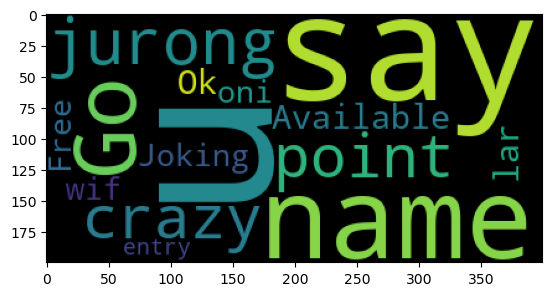

In [16]:
cloud = WordCloud(stopwords = stopwords.words("english"),max_words= 15).generate(str(spam1['X']))
plt.imshow(cloud)

In [19]:
spam_ham = spam1[spam1.Y== 'ham']
spam_spam = spam1[spam1.Y== 'spam']

In [20]:
spam_ham

,Y,X
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
6769,ham,Huh y lei...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [21]:
spam_spam

,Y,X
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
6741,spam,Want explicit SEX in 30 secs? Ring 02073162414...
6744,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
6751,spam,Had your contract mobile 11 Mnths? Latest Moto...
6770,spam,REMINDER FROM O2: To get 2.50 pounds free call...


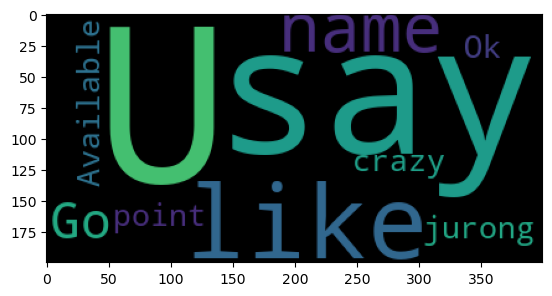

In [25]:
cloud = WordCloud(stopwords = stopwords.words("english"),max_words= 10).generate(str(spam_ham['X']))
plt.imshow(cloud)

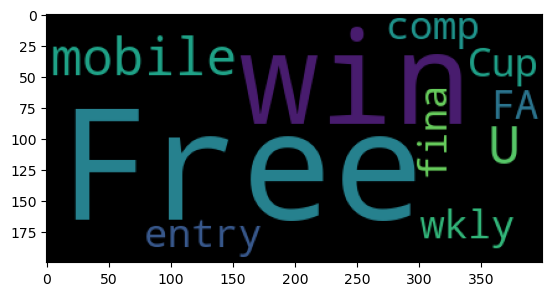

In [26]:
cloud = WordCloud(stopwords = stopwords.words("english"),max_words= 10).generate(str(spam_spam['X']))
plt.imshow(cloud)

In [ ]:
# play full session 
# POS , STEMMING , NER 

In [ ]:
# NLTK , SPACY 
# SPACY - design for POS , NER, STEMMING 

In [1]:
!pip install spacy

  Using cached spacy-3.6.0-cp39-cp39-win_amd64.whl (12.3 MB)
     -------------------------------------- 48.9/48.9 kB 165.1 kB/s eta 0:00:00
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
     ---------------------------------------- 2.2/2.2 MB 105.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 101.4 kB/s eta 0:00:00
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
     -------------------------------------- 96.8/96.8 kB 191.0 kB/s eta 0:00:00
     ------------------------------------- 483.6/483.6 kB 98.4 kB/s eta 0:00:00
     -------------------------------------- 45.9/45.9 kB 151.6 kB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 115.1 kB/s eta 0:00:00
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [2]:
import spacy

In [3]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 69.4 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import en_core_web_sm # this is eng deictionary pre trained on many 

In [6]:
lang = spacy.load("en_core_web_sm")

In [7]:
doc = lang("mumbai is a financial capital")

In [8]:
type(doc)

spacy.tokens.doc.Doc

In [13]:
for i in doc:
    print(i.text, i.pos_)

mumbai NOUN
is AUX
a DET
finainacial ADJ
capital NOUN


In [14]:
doc1 = lang("this is monsoon. its raining these days")

In [15]:
for i in doc1.sents: # break doc to sentences 
    print(i)
    

this is monsoon.
its raining these days


In [18]:
for token in doc1:
    print(token.text , token.pos_)

this PRON
is AUX
monsoon NOUN
. PUNCT
its PRON
raining NOUN
these DET
days NOUN


In [24]:
doc2 = lang('Prachi lives in Nashik which is part of Maharashtra in India')

In [25]:
for i in doc2.ents:
    print(i)
    print(i.label_)
    print("-----")

Maharashtra in
ORG
-----
India
GPE
-----


In [26]:
doc3 = lang("GPD of india is $3 trillion usd")

In [30]:
for i in doc3.ents:
    print(i)
    print(i.label_)
    print(str(spacy.explain(i.label_)))
    print("-----")

GPD
ORG
Companies, agencies, institutions, etc.
-----
india
GPE
Countries, cities, states
-----
$3 trillion
MONEY
Monetary values, including unit
-----


In [ ]:
# stemming 

In [31]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [32]:
stemmer =  SnowballStemmer(language = "english")

In [33]:
word_list = [ 'swim' ,'swimmer' , 'swimming' , 'matches',
             'mens' , 'laughing'  ,'cars' , 'loving' , 
             'humans' ,'indians' ]

In [ ]:
# we want to find the root word for all the words mention i nwordlist

In [34]:
stemmer.stem('caring')

'care'

In [ ]:
# stops words with spacy lib

In [36]:
print(lang.Defaults.stop_words)

{'made', 'hereby', 'please', 'were', 'between', 'below', 'over', 'many', 'hereupon', 'empty', 'thereupon', 'next', 'for', 'noone', 'whence', 'mine', 'often', '‘d', 'they', 'whereupon', 'beyond', 'least', 'at', "'d", 'only', 'used', 'otherwise', 'ours', '’re', 'n‘t', 'of', 'still', 'once', 'nine', 'becoming', 'through', 'whom', 'therefore', 'do', 'would', 'his', 'keep', 'all', 'myself', 'because', 'same', 'whereby', 'has', 'amongst', 'hers', 'always', 'by', 'why', 'regarding', 'could', 'fifty', 'whenever', 'there', 'twelve', 'nor', 'too', 'himself', 'on', 'how', 'doing', 'anyway', 'several', 're', 'did', 'had', 'moreover', 'yet', 'via', 'somehow', 'side', 'in', 'toward', 'hundred', 'whereas', 'latter', 'already', 'somewhere', 'eleven', 'though', '’s', 'then', 'less', 'down', 'any', 'third', 'the', 'into', 'give', 'quite', 'around', 'should', 'became', '‘m', 'either', 'amount', 'whose', 'across', 'more', '‘s', 'something', 'where', 'see', 'go', '‘re', 'or', 'to', 'seem', 'you', 'beside',